# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Retrieve data

In [2]:
dataset = pd.read_csv('../raw_data/HR_Engagement_Sat_Sales_UpdatedV4.0.csv')

In [3]:
pd.set_option('display.max_columns', None)
print(dataset.shape)
dataset.head()

(14999, 62)


,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


# Exploring the dataset

In [4]:
# dataset.info()

# Prepare data

In [5]:
dataset.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [6]:
#Delete Name column and ID column
dataset = dataset.drop(columns=['Name','ID'])

In [7]:
print(dataset.shape)

(14999, 60)


## Drop duplicates

In [8]:
#Shows if there are duplicated rows
dataset.duplicated().value_counts()

False    14999
Name: count, dtype: int64

In [9]:
#Shows if there are duplicated rows
dataset.duplicated().sum() 

0

## Missing data handling (approximation 1 : select full columns only)

In [10]:
print(dataset.shape)
dataset.head()

(14999, 60)


,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [11]:
#Extract only full columns of the dataset
filling = dataset.count()/len(dataset) == 1
filling = filling[filling == True]
full_col_names = filling.index.to_list()
full_col_names

dataset = dataset[full_col_names]
print(dataset.shape)
dataset.head()

(14999, 50)


,Department,GEO,Role,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,Operations,US,VP,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,0,sales,low,M,5,4,3,1,1,1,1,2,1,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,Sales,UK,Senior Director,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,0,accounting,low,F,58,3,3,4,3,2,1,2,1,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,Finance,France,Senior Director,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,Human Resources,China,Senior Director,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,IT,Korea,Director,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,0,sales,low,F,6,4,5,4,5,1,1,2,1,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [12]:
#Data types of dataset
dataset.dtypes.value_counts()

int64      42
object      6
float64     2
Name: count, dtype: int64

## Approximation 2 : Select only numerical columns

In [13]:
# Select only numerical columns in dataset
dataset = dataset.select_dtypes(exclude=[object])
print(dataset.shape)
dataset.head()

(14999, 44)


,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,0,5,4,3,1,1,1,1,2,1,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,0,58,3,3,4,3,2,1,2,1,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,0,42,2,4,1,3,1,1,2,2,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,0,37,3,1,4,5,2,1,2,1,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,0,6,4,5,4,5,1,1,2,1,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [14]:
#Data types of dataset
dataset.dtypes.value_counts()

int64      42
float64     2
Name: count, dtype: int64

In [15]:
print(dataset.shape)
dataset.head()

(14999, 44)


,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,0,5,4,3,1,1,1,1,2,1,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,0,58,3,3,4,3,2,1,2,1,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,0,42,2,4,1,3,1,1,2,2,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,0,37,3,1,4,5,2,1,2,1,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,0,6,4,5,4,5,1,1,2,1,1,4,1,5,3,5,1,2,5,4,3149,80,10


## Define X (features)

In [16]:
#Features
X = dataset.drop(columns=['left_Company'])
print(X.shape)
X.head()

(14999, 43)


,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,5,4,3,1,1,1,1,2,1,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,58,3,3,4,3,2,1,2,1,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,42,2,4,1,3,1,1,2,2,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,37,3,1,4,5,2,1,2,1,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,6,4,5,4,5,1,1,2,1,1,4,1,5,3,5,1,2,5,4,3149,80,10


## Define y (target)

In [17]:
#Target
y = dataset['left_Company']
print(y.shape)
y.head()

(14999,)


0    0
1    0
2    0
3    0
4    0
Name: left_Company, dtype: int64

## Outliers

/tmp/ipykernel_84917/244827543.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,2))


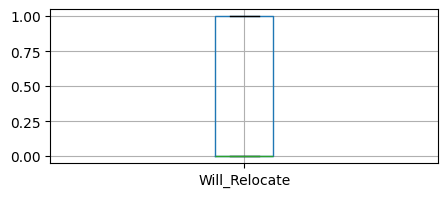

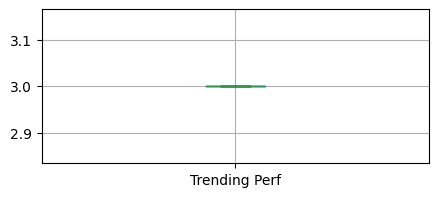

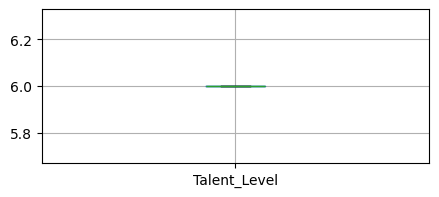

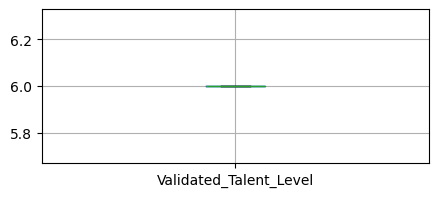

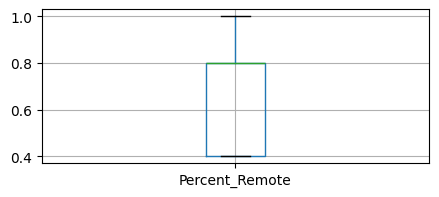

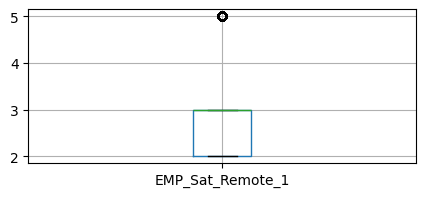

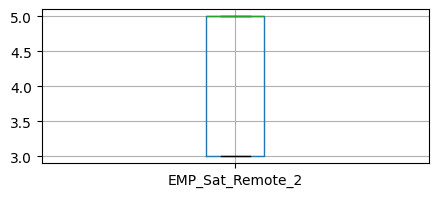

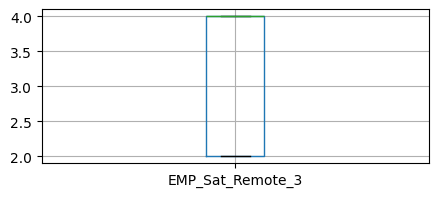

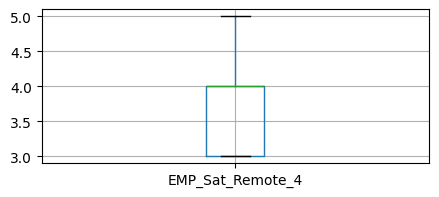

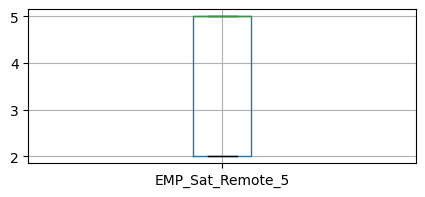

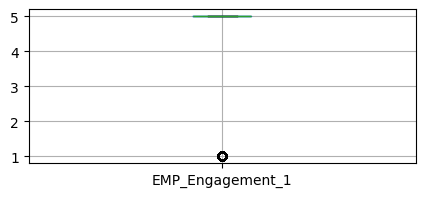

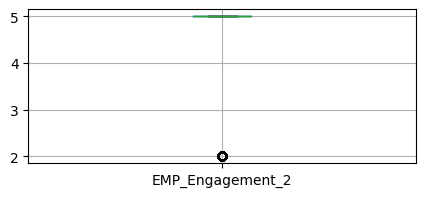

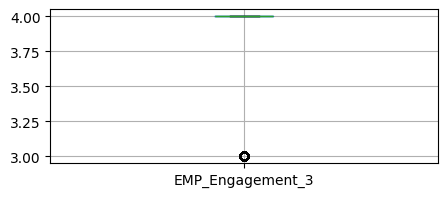

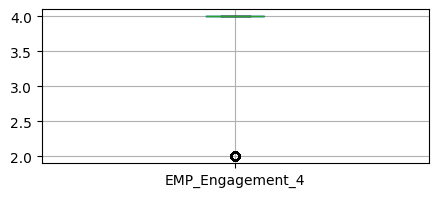

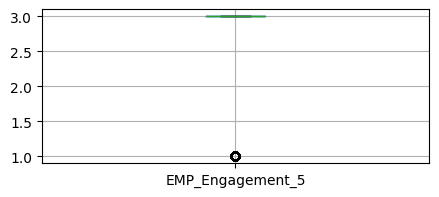

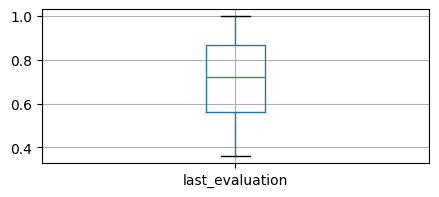

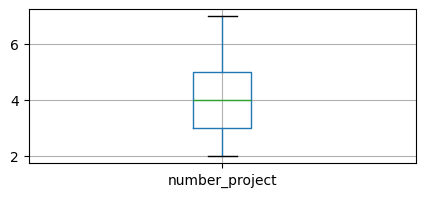

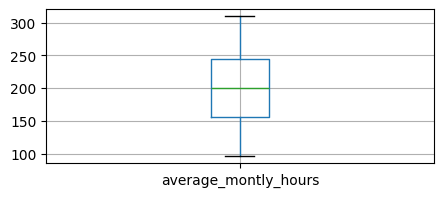

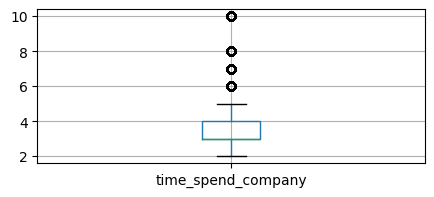

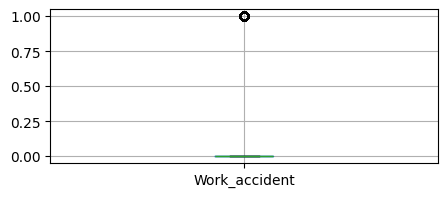

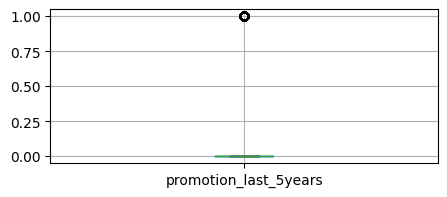

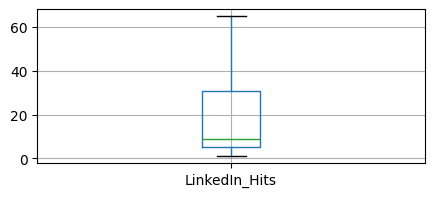

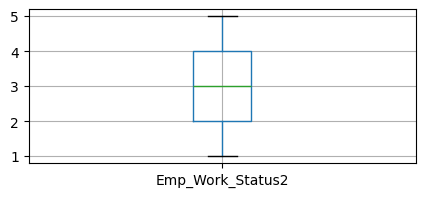

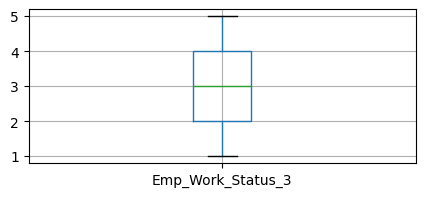

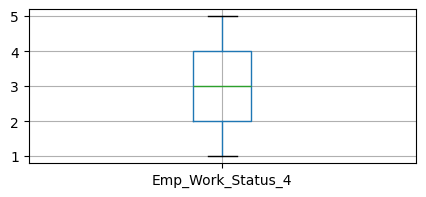

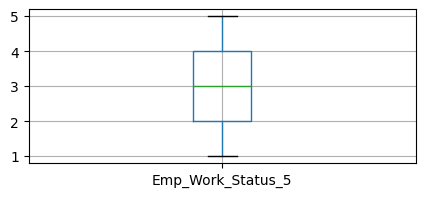

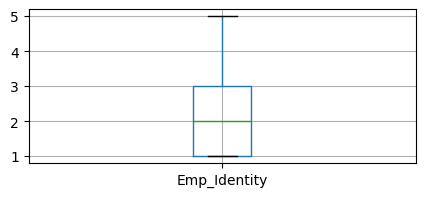

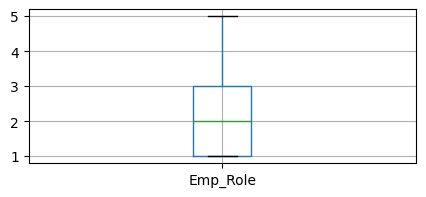

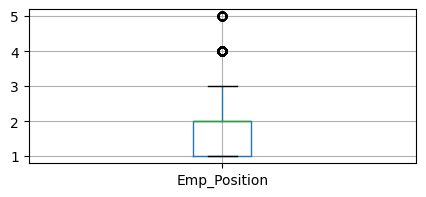

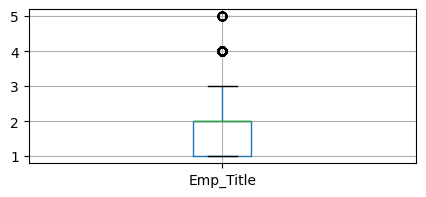

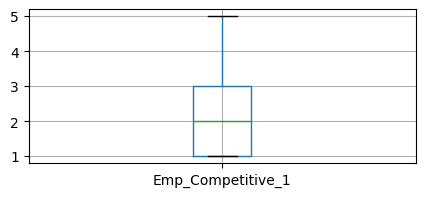

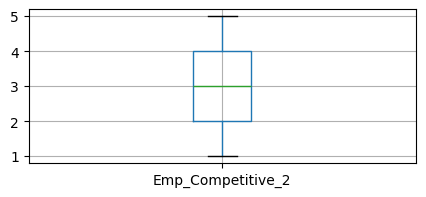

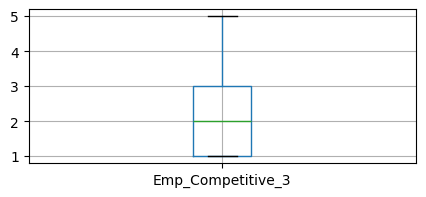

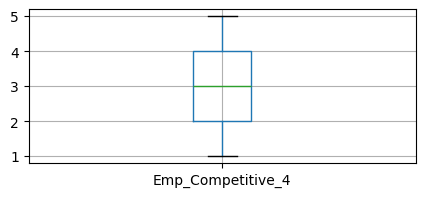

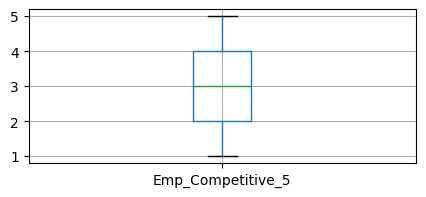

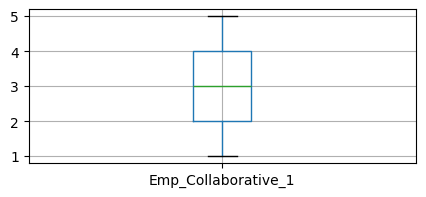

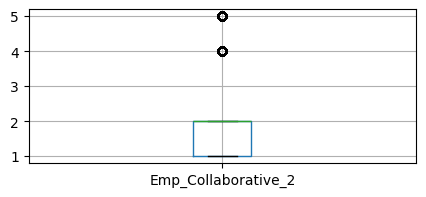

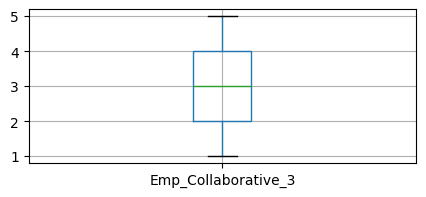

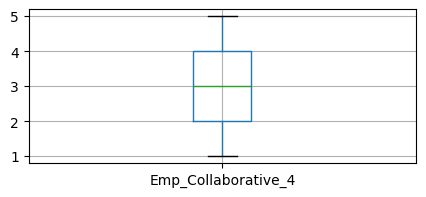

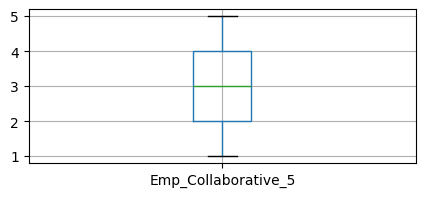

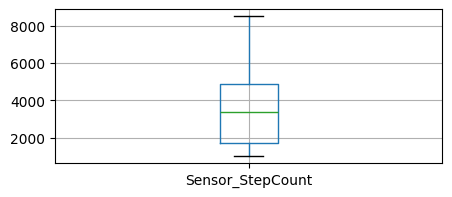

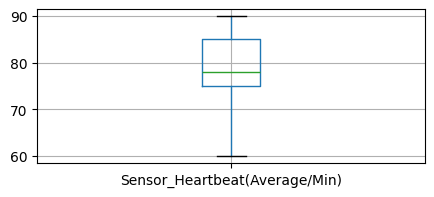

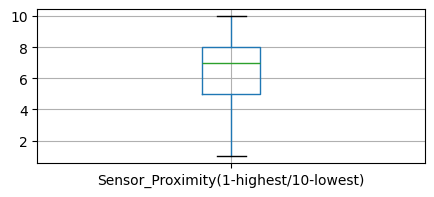

In [18]:
#Check for outliers
cols = X.columns.to_list()

for index, col in enumerate(cols):
        plt.figure(figsize=(5,2))
        X.boxplot(column=col);

## Feature correlation

<Axes: >

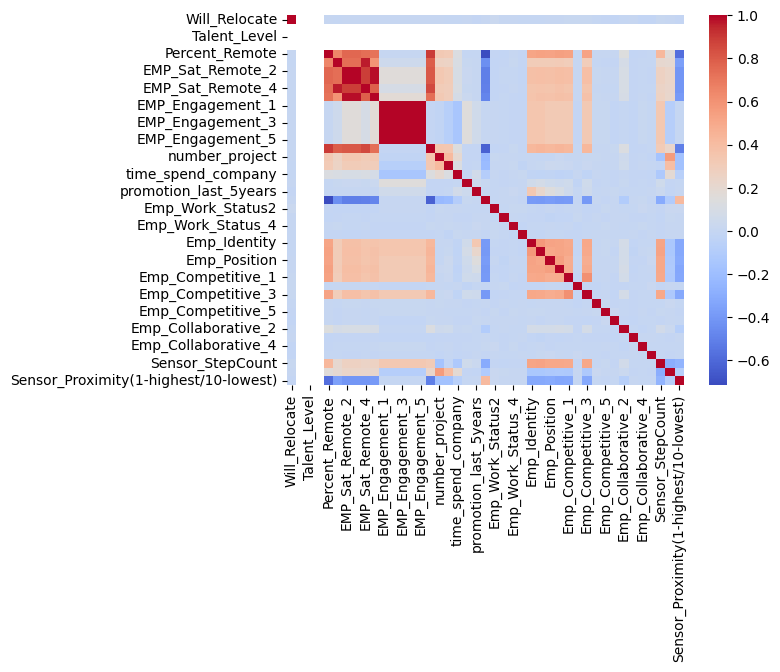

In [19]:
#Compute feature correlation
sns.heatmap(X.corr(), cmap='coolwarm')

## Scaling : Standard Scaler

In [20]:
print(X.shape)
X.head()

(14999, 43)


,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,5,4,3,1,1,1,1,2,1,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,58,3,3,4,3,2,1,2,1,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,42,2,4,1,3,1,1,2,2,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,37,3,1,4,5,2,1,2,1,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,6,4,5,4,5,1,1,2,1,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [21]:
#Instanciating StandardScaler
std_scaler = StandardScaler().set_output(transform="pandas")

In [22]:
#Fitting scaler to features
std_scaler.fit(X)

StandardScaler()

In [23]:
X_std = std_scaler.transform(X) 
print(X_std.shape)
X_std.head()

(14999, 43)


,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,-0.999667,0.0,0.0,0.0,-1.121168,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,-0.651538,-0.661782,-0.341235,2.432112,-0.147412,-0.713863,0.706023,-0.010208,-1.413786,-1.417496,-1.115417,-1.104762,0.001849,-1.156345,-0.151123,0.714878,-0.139760,-0.710533,-0.698923,-0.693458,0.374196,-0.708174,-1.421983,1.404261,-0.891785,-2.339462,1.004882
1,-0.999667,0.0,0.0,0.0,-1.121168,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,0.971113,-0.841993,-1.026126,-0.411165,-0.147412,2.077564,-0.001320,-0.010208,0.700761,-0.002029,-0.138132,-1.104762,0.001849,-1.156345,-0.151123,-0.696807,-1.110253,0.711860,-1.407004,0.014490,0.374196,1.419469,-1.421983,1.404261,-0.806918,1.659100,0.618484
2,-0.999667,0.0,0.0,0.0,-1.121168,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,-1.462863,1.620892,-0.341235,-0.411165,-0.147412,1.234869,-0.708664,0.695373,-1.413786,-0.002029,-1.115417,-1.104762,0.001849,0.011602,-1.119792,1.420721,-1.110253,-0.710533,1.425321,-0.693458,0.374196,0.710255,0.705460,0.696134,-0.121715,0.280286,0.618484
3,-0.999667,0.0,0.0,0.0,-1.121168,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,0.159788,1.540798,0.343655,2.432112,-0.147412,0.971527,-0.001320,-1.421371,0.700761,1.413438,-0.138132,-1.104762,0.001849,-1.156345,-1.119792,-1.402650,-0.139760,1.423057,-1.407004,-1.401407,0.374196,0.710255,0.705460,-1.428244,-0.090388,-0.133359,-0.154312
4,-0.999667,0.0,0.0,0.0,-1.121168,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,1.782438,1.100282,1.028546,-0.411165,-0.147412,-0.661195,0.706023,1.400954,0.700761,1.413438,-1.115417,-1.104762,0.001849,-1.156345,-1.119792,0.714878,-1.110253,1.423057,0.009158,1.430387,-0.781604,-0.708174,1.414607,0.696134,-0.146777,0.280286,1.391280


## Approximation 3 : Pick random columns

In [24]:
# Pick random features (baseline)
rand_std_col = X_std.std().sort_values(ascending=False).sample(10, random_state=999)
rand_std_col_names = rand_std_col.index.to_list()
X_std = X_std[rand_std_col_names]
print(X_std.shape)
X_std.head()

(14999, 10)


,average_montly_hours,time_spend_company,Emp_Competitive_3,number_project,Emp_Competitive_5,Validated_Talent_Level,promotion_last_5years,Emp_Title,Emp_Collaborative_3,EMP_Sat_Remote_5
0,-0.661782,-0.341235,-0.139760,-0.651538,-0.698923,0.0,-0.147412,-1.156345,-0.708174,-1.443304
1,-0.841993,-1.026126,-1.110253,0.971113,-1.407004,0.0,-0.147412,-1.156345,1.419469,-1.443304
2,1.620892,-0.341235,-1.110253,-1.462863,1.425321,0.0,-0.147412,0.011602,0.710255,-1.443304
3,1.540798,0.343655,-0.139760,0.159788,-1.407004,0.0,-0.147412,-1.156345,0.710255,-1.443304
4,1.100282,1.028546,-1.110253,1.782438,0.009158,0.0,-0.147412,-1.156345,-0.708174,-1.443304


## Check target balance

In [25]:
# Checking balance
y.value_counts()/len(y)*100

left_Company
0    76.191746
1    23.808254
Name: count, dtype: float64

**The target is imbalanced.** <br>
**Let's correct it by oversampling the upcoming train set.**

## Train test split

In [26]:
# Create a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_std, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=10)

In [27]:
#Check shapes
print(f"X_train shape is : {X_train.shape}")
print(f"y_train shape is : {y_train.shape}\n")
print(f"X_test shape is : {X_test.shape}")
print(f"y_test shape is : {y_test.shape}")

X_train shape is : (10499, 10)
y_train shape is : (10499,)

X_test shape is : (4500, 10)
y_test shape is : (4500,)


In [28]:
# Check that target train set is imbalanced
y_train.value_counts()/len(y_train)*100

left_Company
0    75.997714
1    24.002286
Name: count, dtype: float64

## Oversampling

In [29]:
#Instanciating SMOTE
smote = SMOTE()
smote

SMOTE()

In [30]:
#Oversampling features and target
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [31]:
# Check that target resampled train set is imbalanced
y_train_resampled.value_counts()/len(y_train_resampled)*100

left_Company
0    50.0
1    50.0
Name: count, dtype: float64

In [32]:
#Check shapes
print(f"X_train shape is : {X_train.shape}")
print(f"y_train shape is : {y_train.shape}\n")
print(f"X_train_resampled shape is : {X_train_resampled.shape}")
print(f"y_train_resampled shape is : {y_train_resampled.shape}")

X_train shape is : (10499, 10)
y_train shape is : (10499,)

X_train_resampled shape is : (15958, 10)
y_train_resampled shape is : (15958,)


# Logistic regression

## Fitting step

In [33]:
# Instanciate the logistic regression model
log_reg_mdl = LogisticRegression()
log_reg_mdl

LogisticRegression()

In [34]:
#Fitting the model to train set (features and target)
log_reg_mdl.fit(X_train_resampled ,y_train_resampled)

LogisticRegression()

## Evaluation

### Quick score : Mean accuracy

In [35]:
#Score on train set
log_reg_mdl.score(X_train_resampled,y_train_resampled)

0.7325479383381376

In [36]:
#Score on test set
log_reg_mdl.score(X_test,y_test)

0.6853333333333333

### Cross validation score : Precision

In [37]:
cv_results = cross_validate(log_reg_mdl,
                            X_train_resampled, 
                            y_train_resampled, 
                            cv=5, 
                            scoring=['precision'])

score = cv_results['test_precision'].mean()
score

0.7048917737313958

In [38]:
#Saving best random columns
auto_save = X_train_resampled.columns
auto_save

Index(['average_montly_hours', 'time_spend_company', 'Emp_Competitive_3',
       'number_project', 'Emp_Competitive_5', 'Validated_Talent_Level',
       'promotion_last_5years', 'Emp_Title', 'Emp_Collaborative_3',
       'EMP_Sat_Remote_5'],
      dtype='object')